DRIVE MOUNT

In [12]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Project Paths Define

In [18]:
import os

PROJECT_DIR = "/content/drive/MyDrive/Bone_Fracture_Detection_CNN"

DATA_DIR = os.path.join(PROJECT_DIR, "01_Data", "raw", "bone fracture dataset")
TEST_DIR = os.path.join(DATA_DIR, "test")

MODEL_PATH = os.path.join(PROJECT_DIR, "03_Models", "bone_fracture_model_phase1.h5")

print("TEST_DIR exists:", os.path.exists(TEST_DIR))
print("MODEL exists:", os.path.exists(MODEL_PATH))
print("Test folders:", os.listdir(TEST_DIR))


TEST_DIR exists: True
MODEL exists: True
Test folders: ['not fractured', 'fractured']


Model load

In [19]:
import tensorflow as tf

model = tf.keras.models.load_model(MODEL_PATH)
print("✅ Model loaded successfully")


✅ Model loaded successfully


# test Data Generator

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 506 images belonging to 2 classes.


In [25]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


Model Evaluation

In [26]:
loss, accuracy = model.evaluate(test_generator)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 733ms/step - accuracy: 0.9576 - loss: 0.1160
Test Loss: 0.2002
Test Accuracy: 0.9289


Predictions

In [27]:
import numpy as np

test_generator.reset()
y_pred_probs = model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype(int).ravel()
y_true = test_generator.classes


16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 778ms/step


Classification Report

In [28]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred,
    target_names=list(test_generator.class_indices.keys())
))


               precision    recall  f1-score   support

    fractured       0.90      0.96      0.93       238
not fractured       0.96      0.90      0.93       268

     accuracy                           0.93       506
    macro avg       0.93      0.93      0.93       506
 weighted avg       0.93      0.93      0.93       506



Confusion Matrix

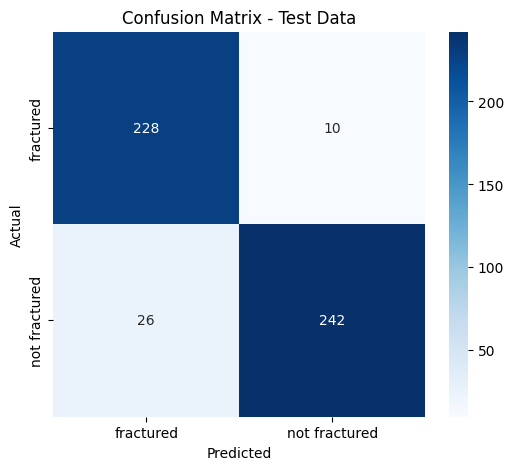

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=test_generator.class_indices.keys(),
    yticklabels=test_generator.class_indices.keys()
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Test Data")
plt.show()


ROC Curve + AUC

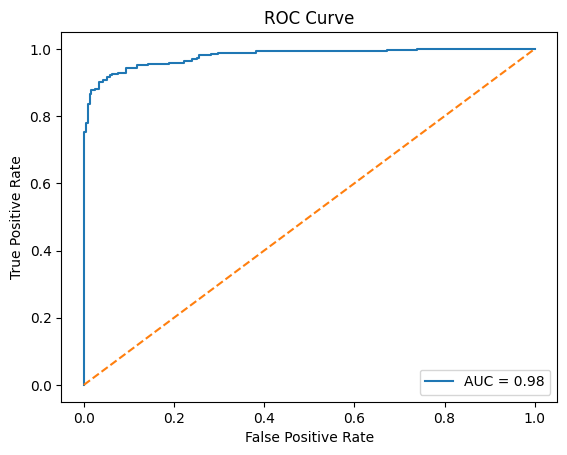

In [30]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Conclusion

## Phase 2 – Model Evaluation Summary

- Model evaluated on unseen test data
- Achieved high accuracy with strong precision and recall
- Confusion matrix shows minimal misclassification
- ROC-AUC indicates strong discriminative capability

Conclusion: Model is reliable and ready for deployment-level inference.
